In [1]:
from sklearn.cluster import KMeans
import numpy as np
X = np.array([[1, 2], [1, 4], [1, 0],
[4, 2], [4, 4], [4, 0]])
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
print "Clusters %s"%(kmeans.labels_)
print "Cluster centroids: %s"%(kmeans.cluster_centers_)
print "Prediction cluster of [0, 0], [4, 4]: %s"%(kmeans.predict([[0,
0], [4, 4]]))

Clusters [0 0 0 1 1 1]
Cluster centroids: [[ 1.  2.]
 [ 4.  2.]]
Prediction cluster of [0, 0], [4, 4]: [0 1]


Estimator	Homogeneity	Completeness	V-means	ARI	AMI	Silhouette
k=8	0.926	0.510	0.658	0.456	0.498	0.363
k=3	0.751	0.765	0.758	0.730	0.748	0.553
k=3 (random init)	0.736	0.747	0.742	0.716	0.733	0.551


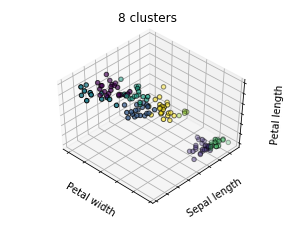

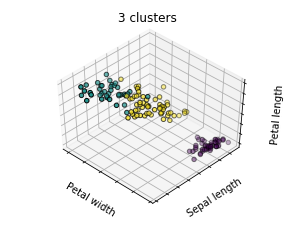

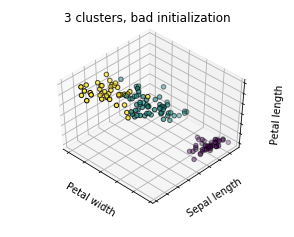

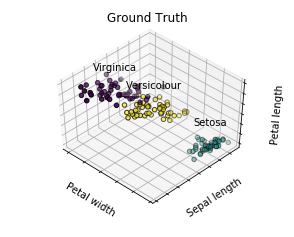

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn import metrics

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

estimators = [('k=8', KMeans(n_clusters=8)),
              ('k=3', KMeans(n_clusters=3)),
              ('k=3 (random init)', KMeans(n_clusters=3, n_init=1,
                                               init='random'))]

# print metric measure headers
print ("Estimator\tHomogeneity\tCompleteness\tV-means\tARI\tAMI\tSilhouette")

fignum = 1
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']
for name, est in estimators:
	fig = plt.figure(fignum, figsize=(4, 3))
	ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
	est.fit(X)
	labels = est.labels_

	# measure cluster qualities
	print('%s\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, 
             metrics.homogeneity_score(y, est.labels_),
             metrics.completeness_score(y, est.labels_),
             metrics.v_measure_score(y, est.labels_),
             metrics.adjusted_rand_score(y, est.labels_),
             metrics.adjusted_mutual_info_score(y, est.labels_),
             metrics.silhouette_score(X, est.labels_, metric='euclidean')))
			

	ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(np.float), edgecolor='k')

	ax.w_xaxis.set_ticklabels([])
	ax.w_yaxis.set_ticklabels([])
	ax.w_zaxis.set_ticklabels([])
	ax.set_xlabel('Petal width')
	ax.set_ylabel('Sepal length')
	ax.set_zlabel('Petal length')
	ax.set_title(titles[fignum - 1])
	ax.dist = 12
	fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
	ax.text3D(X[y == label, 3].mean(), X[y == label, 0].mean(), X[y == label, 2].mean() + 2, name, horizontalalignment='center', bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))

# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12

#fig.show()
plt.show()



Silhouette score(k=2): 0.623005


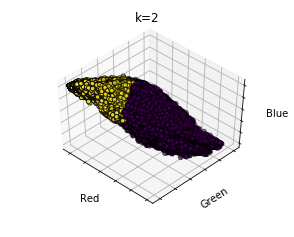

Silhouette score(k=3): 0.578719


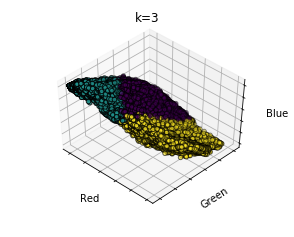

Silhouette score(k=4): 0.560250


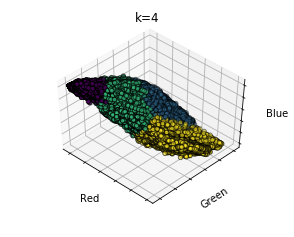

Silhouette score(k=5): 0.528165


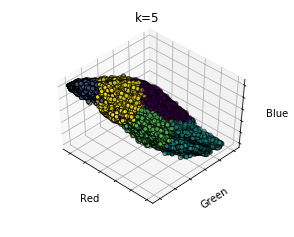

Silhouette score(k=6): 0.525838


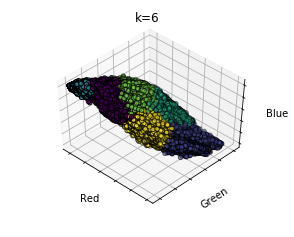

Silhouette score(k=7): 0.489488


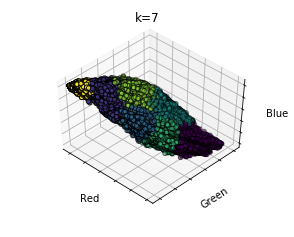

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn import metrics

from numpy.random import randint
from PIL import Image

np.random.seed(5)

#iris = datasets.load_iris()
#X = iris.data
#y = iris.target

img = Image.open("photo.jpg")
img = np.array(img, dtype=np.float64)
w, h, d = original_shape = tuple(img.shape)
X = np.reshape(img, (w * h, d))

for i in range(2, 8):
    na = 'k=%d'%(i)
    esti = KMeans(n_clusters=i)
    estimators=[(na, esti)]

    fignum = 1
    for name, est in estimators:
        fig = plt.figure(fignum, figsize=(4, 3))
        ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
        km=est.fit(X)
        labels = est.labels_

        print "Silhouette score(%s): %f"%(name, metrics.silhouette_score(X, est.labels_, sample_size=1000))
			
        ax.scatter(X[:, 0], X[:, 1],X[:, 2],c=labels.astype(np.float), edgecolor='k')
 
        ax.w_xaxis.set_ticklabels([])
        ax.w_yaxis.set_ticklabels([])
        ax.w_zaxis.set_ticklabels([])
        ax.set_xlabel('Red')
        ax.set_ylabel('Green')
        ax.set_zlabel('Blue')
        ax.set_title(name)
        ax.dist = 12
        fignum = fignum + 1

        plt.show()


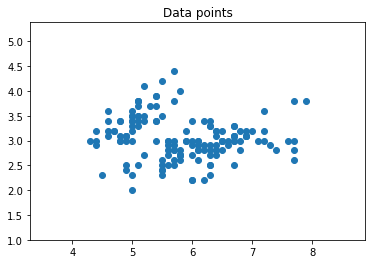

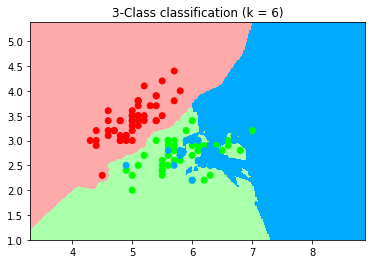

In [8]:
import matplotlib
 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
 
n_neighbors = 6
 
# import some data to play with
iris = datasets.load_iris()
 
# prepare data
X = iris.data[:, :2]  
y = iris.target
h = .02 
 
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00','#00AAFF'])
 
# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X, y)
 
# calculate min, max and limits
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Put the result into a color plot
plt.figure()
plt.scatter(X[:, 0], X[:, 1])
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Data points")
plt.show()
 
# predict class using data and kNN classifier
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
 
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
 
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i)" % (n_neighbors))
plt.show()
